# A three-sided dice

The probabilistic nature of quantum mechanics can be exploited in order to produce true randomness. If the quantum system is in superposition, a measurement will colapse the system into any of the states of the base. In our case, we can do this using our three-level system. We start importing the necessary packages.

In [1]:
import threerra
import numpy as np
from threerra.discriminators.LDA_discriminator import train_discriminator
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Now, we choose the quantum processor that we are going to use as a random number generator.

In [2]:
# Choose device
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_armonk')

We calibrate and train the discriminator

In [3]:
qc = threerra.QuantumCircuit3(backend)
qc.calibrate_freq_12()
qc.calibrate_pi_amp_12()
train_discriminator(qc)

Calibrating qubit_freq_est_12...
Job Status: job has successfully run
qubit_freq_est_12 updated from 4.624395869169078GHz to 4.623665090345999GHz.
Calibrating pi_amp_12...
Job Status: job has successfully run
pi_amp_12 updated from 0.33025991905409463 to 0.3386071056422093.
Training discriminator...
Job Status: job has successfully run
Discriminator achieved an accuracy of 91.89% after training.


We want the three options, 0, 1, and 2, to be equally probable. For this we create a circuit that generates $\frac{1}{\sqrt{3}}( | 0 \rangle + | 1 \rangle + | 2 \rangle)$. 

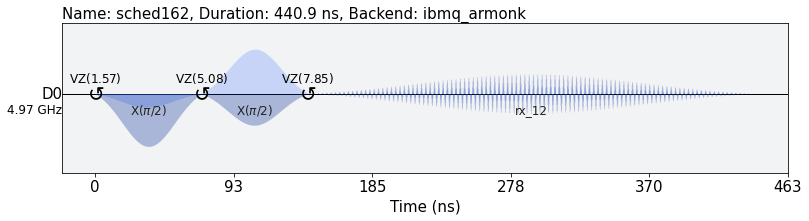

In [4]:
# Test QuantumCircuit3
qc = threerra.QuantumCircuit3(backend)
qc.rx_01(1.94)
qc.rx_12(np.pi/2)
qc.draw() 

Now measure the circuit. In this case, we measure 1024 in order to test that the probability distribution is the one we want.

In [5]:
qc.measure()
job = qc.run(shots=1024)
job_monitor(job)
result = job.result()

Job Status: job has successfully run


The results we obtain are not processed. We need to classify the results as 0, 1, and 2. For this we use the discriminator we built. 

In [6]:
from threerra.tools import get_data, get_counts
from threerra.discriminators.LDA_discriminator import discriminator as lda_disc

In [7]:
counts_lda = get_counts(result, discriminator=lda_disc)

We plot the histogram of the counts. The distribution is somewhat uniform, and we can use it as a random number generator

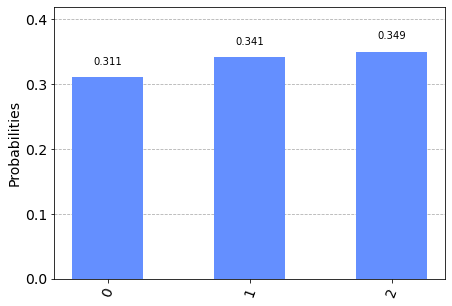

In [8]:
plot_histogram(counts_lda)

Now, if we want a random number, we apply 

In [9]:
qc = threerra.QuantumCircuit3(backend)
qc.rx_01(1.94)
qc.rx_12(np.pi/2)
qc.measure()
job = qc.run(shots=1)
job_monitor(job)
result = job.result()
number = get_data(result, discriminator=lda_disc)

Job Status: job has successfully run


In [10]:
number

array([0])